# Repetition - Aufgabe 8.5

Im Jahr 2013 wurden im Rahmen einer internationalen Zusammenarbeit unter der Leitung der EAWAG in Dübendorf Konzentrationen von illegalen Substanzen im Abwasser von 42 europäischen Städten während einer Woche untersucht (Ort C. et all, _Spatial differences and temporal changes in illicit drug use in Europe quantified by wastewater analysis_, Addiction 2014 Aug).


Dabei wurden an 7 aufeinanderfolgenden Tagen (6.-12. März) neben anderen Substanzen die medianen Konzentrationen von Ecstasy (MDMA) im Abwasser gemessenen. Aufgrund dieser Studie war eine Aussage einer vielgelesenen Schweizer Gratiszeitung, dass in Zürich viel mehr Drogen konsumiert werden als anderswo.

In der nachfolgenden Tabellle sind für die Städte Zürich und Basel die an den untersuchten Tagen ausgeschiedenen Mengen MDMA aufgeführt. Die Angaben sind in mg pro 1000 Einwohner pro Tag.

----------------------------------------------------------
| Zürich  | 16.3 | 12.7 | 14.0 | 53.3 | 117  | 62.6 | 27.6 |
|-------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| Basel   | 10.4 | 8.91 | 11.7 | 29.9 | 46.3 | 25.0 | 29.4 |

Nehmen Sie an, dass die täglichen Differenzen $D_i$
zwischen den pro tausend Einwohner ausgeschiedenen Mengen von MDMA im Abwasser von Zürich und Basel unabhängig voneinander
normalverteilt mit Erwartungswert $\mu_D$
und Standardabweichung $\sigma_D$ sind.

(a) Schätzen Sie aus den Daten den Mittelwert und die
Standardabweichung der Differenzen, d.h., $\widehat{\mu}_D$ und $\widehat{\sigma}_D$.



In [3]:
import numpy as np
from pandas import Series

mdma_zuerich = Series([16.3, 12.7, 14.0, 53.3, 117, 62.6, 27.6])
mdma_basel = Series([10.4, 8.91, 11.7, 29.9, 46.3, 25.0, 29.4])
d = mdma_zuerich - mdma_basel

print('Mittelwert Differenzen: ', d.mean())
print('Standardabweichung Differenzen: ', d.std())

d.describe()

Mittelwert Differenzen:  20.27
Standardabweichung Differenzen:  26.272304175056032


count     7.000000
mean     20.270000
std      26.272304
min      -1.800000
25%       3.045000
50%       5.900000
75%      30.500000
max      70.700000
dtype: float64

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([ 12.7,  14. ,  16.3,  27.6,  53.3,  62.6, 117. ])),
 (38.73276948457169, 43.357142857142854, 0.9116800041693465))

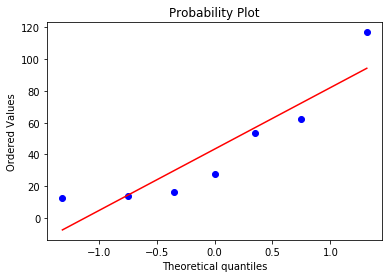

In [21]:
import scipy.stats as st
import matplotlib.pyplot as plt

st.probplot(mdma_zuerich, plot=plt)

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([ 8.91, 10.4 , 11.7 , 25.  , 29.4 , 29.9 , 46.3 ])),
 (14.52722722416227, 23.087142857142858, 0.9514481592321198))

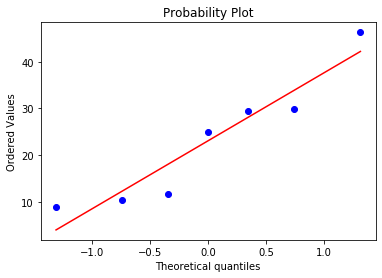

In [22]:
st.probplot(mdma_basel, plot=plt)

Auf den ersten Blick scheint die Sachlage klar : in Zürich wird 
mehr MDMA konsumiert. Wir stellen dann allerdings fest, dass die 
Differenzen eine ziemlich grosse Streuung aufweisen.

---
(b) Handelt es sich um gepaarte oder ungepaarte Stichproben? Begründen Sie Ihre
Antwort.

Die Städte Zürich und Basel können 
als unterschiedliche Versuchseinheiten aufgefasst werden. 
Wir fassen die Stichproben also als **ungepaart** auf.

(c) Formulieren Sie die Nullhypothese und die Alternativhypothese, wenn Sie
die Aussage der besagten Gratiszeitung überprüfen möchten.


Die Nullhypothese lautet, dass es keinen Unterschied zwischen den beiden
Städten in Bezug auf die ausgeschiedene Menge an MDMA gibt, also 
$\mu_D=\mu_{\text{Zürich}}- \mu_{\text{Basel}}=\mu_0=0$.
Die Alternativhypothese entspricht der Behauptung der Gratiszeitung, nämlich
dass in Zürich mehr Drogen konsumiert werden und damit mehr MDMA ausgeschieden
wird, also $\mu_D>\mu_0=0$.

(d) Führen Sie einen statistischen Test mit Hilfe von `Python` auf dem
Signifikanzniveau 5\% durch, unter der Annahme, dass die Daten normalverteilt sind.


In [16]:
st.ttest_ind(mdma_zuerich, mdma_basel, equal_var=False).pvalue / 2

0.11162832923388875

In diesem Fall ist der zweiseitige $P$-Wert`pvalue=0.2`, d.h., 
der einseitige $P$-Wert ist grösser als $0.05$, womit die 
Nullhypothese beibehalten wird.

Würden wir die Daten als gepaarte Stichproben 
auffassen, dann haben wir für 
$\overline{D}_n\sim\mathcal{N}\left (\mu_D,\frac{\sigma_D^2}{n}\right )$ (Zentraler Grenzwertsatz). Dann ist die Teststatistik:
$$
T = \frac{\overline{D}_n-\mu_0}{\widehat{\sigma}_D/\sqrt{n}}
=\frac{\sqrt{n}\overline{D}_n}{\widehat{\sigma}_D}
$$

Verteilung von $T$ unter $H_0$: $T\sim t_{n-1}= t_{6}$. Mit Python ergibt sich : 

In [15]:
st.ttest_rel(mdma_zuerich, mdma_basel).pvalue / 2

0.04364420087652841

Da wir hier einen einseitigen Test haben und Python den P-Wert 
für eine zweiseitige Alternative berechnet, müssen wir den Wert für `pvalue` halbieren und somit ist der  $P$-Wert $0.04364$. Er ist (knapp)  kleiner als $\alpha=0.05$, und somit wird  auf dem 5\% Signifikanzniveau die Nullhypothese verworfen. Falls die Daten also als 
gepaarte Stichproben aufgefasst würden, lautet die Schlussfolgerung, dass signifikant mehr Ecstasy in Zürich als in Basel konsumiert wird.



(e) Führen Sie nun einen statistischen Test mit Hilfe von Python auf dem Signifikanzniveau 5\% durch, unter der Annahme, dass die Daten nicht normalverteilt sind.

In [23]:
st.mannwhitneyu(mdma_zuerich, mdma_basel, alternative='greater')

MannwhitneyuResult(statistic=34.0, pvalue=0.12507650397969117)

Für den Mann-Whitney-U-Test kann in Python die Richtung der 
Alternativhypothese definiert werden, und zwar mit `alternative=...`. Wir können folglich den Wert von `pvalue` direkt für den Testentscheid herbeiziehen:  Der (einseitige) P-Wert beträgt in diesem Fall $ 0.13 $ und ist somit grösser als das Signifikanzniveau 5\%. Wir behalten die Nullhypothese also bei. Offenbar hängt der Testentscheid stark von der Verteilungsannahme der Differenzen ab.

(f) Unter der Annahme, dass es sich um gepaarte Stichproben handelt, geben Sie das (einseitige) 95\%-Vertrauensintervall für den Mittelwert der Differenzen an, und fällen Sie damit den Testentscheid für eine einseitige nach oben gerichtete Alternativhypothese.

Das einseitige Vertrauensintervall ist gegeben durch : 
$ [\overline{d}_n - t_{n-1,1-\alpha} \cdot\tfrac{\hat{\sigma}_D}{\sqrt{n}} \; , \; +\infty ) $

In [12]:
# unter grenze vertrauensbereich

d.mean() - t.ppf(0.95, df=d.size-1) * d.std()/(np.sqrt(d.size))

0.9742244749346014

0 ist folglich nicht im Vertrauensintervall enthalten, deswegen verwerfen wir die Nullhypothese in diesem Fall auf dem 5\% Signifikanzniveau.